In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_sens_Tb(n, tint, delnu, bmax,freq):
    Tsky = 10**(7.852) * (freq/1e6)**(-2.5)
    print("Tsky is", Tsky)
    lmbda = 3e8/freq
    synth_b = np.pi*(lmbda/bmax)**2
    print("res is", np.rad2deg(lmbda/bmax)*60, "arcmin")
    denom = synth_b * np.sqrt(2 * n*(n-1) * tint * delnu)
    return 4 * np.pi / denom

In [35]:
def get_sens_mJybeam(n, tint, freq, delnu):
    Tsky = 10**(7.852) * (freq/1e6)**(-2.5)
    print("Tsky is", Tsky)
    lmbda = 3e8/freq
    kb = 1.38e-23
    Ae = lmbda**2/(4*np.pi)
    denom = Ae * np.sqrt(2 * n*(n-1) * tint * delnu)
    return 2 * kb * Tsky / denom * 1e29

def get_sens_mJyarcmin2(n, tint, delnu, bmax,freq):
    Tsky = 10**(7.852) * (freq/1e6)**(-2.5)
    print("Tsky is", Tsky)
    lmbda = 3e8/freq
    kb = 1.38e-23
    Ae = lmbda**2/(4*np.pi)
    res = np.rad2deg(lmbda/bmax)*60 #arcmin
    synth_b = np.pi*res**2
    print("res is", np.rad2deg(lmbda/bmax)*60, "arcmin")
    denom = Ae * synth_b * np.sqrt(2 * n*(n-1) * tint * delnu)
    return 2 * kb * Tsky / denom * 1e29

def get_time2confusion(S, n, freq, delnu):
    # S is in SI units
    Tsky = 10**(7.852) * (freq/1e6)**(-2.5)
    print("Tsky is", Tsky)
    lmbda = 3e8/freq
    kb = 1.38e-23
    Ae = lmbda**2/(4*np.pi)
    tint = ((2*kb*Tsky)/(S*Ae))**2 /( 2 * (n-1) * n * delnu )
    return tint/86400 #days

def flux2Tb(S, freq,bmax):
    lmbda = 3e8/freq
    print(S,lmbda)
    synth_b = np.pi*(lmbda/bmax)**2/4
    print(synth_b)
    kb = 1.38e-23
    denom = 2*kb*synth_b
    print(denom)
    Tbb = S * lmbda**2 /denom
    print(Tbb)
    return Tbb

# def Jyarcmin2_to_Tb(nu,):
#     (1e-26/np.deg2rad(1/60)**2)*

In [36]:
# for HII regions

flux2Tb(1e-27,10e6,10000)

1e-27 30.0
7.068583470577034e-06
1.9509290378792615e-28
4613.186756286822


4613.186756286822

In [24]:
np.pi*(30/10000)**2/4

7.068583470577034e-06

In [28]:
1e-27*1e23*1e6*900/(2*1.38*7)

4658.385093167701

In [5]:
def get_conf(freq, bmax):
    freq = freq/1e6 # MHz
    print(freq,bmax)
    lmbda = 3e2/freq
    res = np.rad2deg(lmbda/bmax)*60 #arcmin
    print(res)
    return 16 * res**1.54 * (freq/74)**(-0.7) #mJy
    

[  5.      5.095   5.19  ...  99.81   99.905 100.   ] 10000
[20.62648062 20.24188481 19.87136862 ...  1.03328728  1.03230472
  1.03132403]
[  5.      5.095   5.19  ...  99.81   99.905 100.   ] 20000
[10.31324031 10.12094241  9.93568431 ...  0.51664364  0.51615236
  0.51566202]
Tsky is [1.27225741e+06 1.21377875e+06 1.15899511e+06 ... 7.14603043e+02
 7.12905458e+02 7.11213514e+02]
Tsky is [1.27225741e+06 1.21377875e+06 1.15899511e+06 ... 7.14603043e+02
 7.12905458e+02 7.11213514e+02]


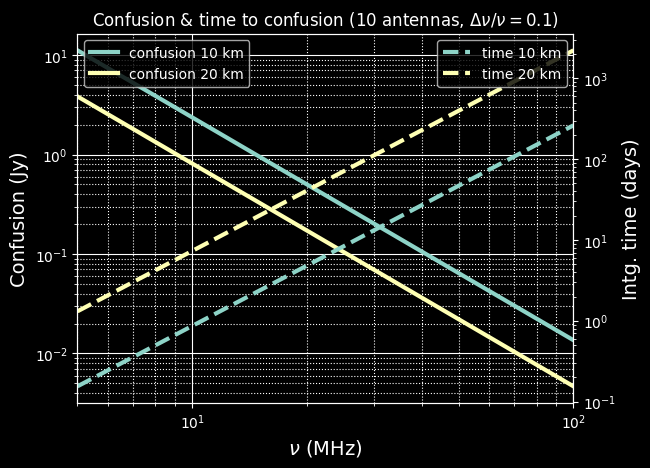

In [6]:
freqs = np.linspace(5,100,1001)*1e6
lmbda = 3e8/freqs
n = 10
bmax = 10000 #m
delnu = 0.1*freqs #Hz


conf_10km = get_conf(freqs,bmax)
res_10km = np.rad2deg(lmbda/bmax)*60 #arcmin
conf_20km = get_conf(freqs,2*bmax)
res_20km = np.rad2deg(lmbda/bmax/2)*60 #arcmin

inttime_10km = get_time2confusion(conf_10km*1e-29, n, freqs, delnu)
inttime_20km = get_time2confusion(conf_20km*1e-29, n, freqs, delnu)
plt.style.use('dark_background')
fig,ax = plt.subplots(1,1)
plt.title(r"Confusion & time to confusion (10 antennas, $\Delta \nu/\nu = 0.1$)")
ax.loglog(freqs/1e6,conf_10km/1e3, linewidth=3, label='confusion 10 km')
ax.loglog(freqs/1e6,conf_20km/1e3, linewidth=3, label='confusion 20 km')
ax.set_ylabel("Confusion (Jy)",fontsize=14)
ax.set_xlabel(r"$\nu$ (MHz)",fontsize=14)
ax.set_xlim(5,100)
ax.grid(which='major', linestyle='-',color="white")
ax.grid(which='minor', linestyle=':',color="white")
ax.legend(loc="upper left")
ax2 = ax.twinx()

ax2.loglog(freqs/1e6,inttime_10km, ls="--", linewidth=3, label="time 10 km")
ax2.set_ylabel("Intg. time (days)",fontsize=14)
ax2.loglog(freqs/1e6,inttime_20km, ls="--", linewidth=3, label="time 20 km")


ax2.legend(loc="upper right")

In [16]:
10**(7.852) * (20)**(-2.5)

39758.044076132996

In [ ]:
#below is old checks

In [67]:
n = 10
bmax = 10000 #m
freq = 30e6 #Hz
delnu = 0.05*freq #Hz
tint = 86400 #s

# print(get_sens(n,tint,delnu,bmax,freq))
print(get_sens_mJybeam(n,tint,delnu,bmax,freq))

Tsky is 14427.69202334952
res is 3.4377467707849396 arcmin
1036.0412709300101


In [63]:
freqs = np.linspace(5,40,1001)*1e6
confs=get_conf(freqs,2*bmax)

[ 5.     5.035  5.07  ... 39.93  39.965 40.   ] 20000
[10.31324031 10.24154947 10.17084843 ...  1.29141502  1.29028404
  1.28915504]


Text(0, 0.5, 'confusion limit(Jy)')

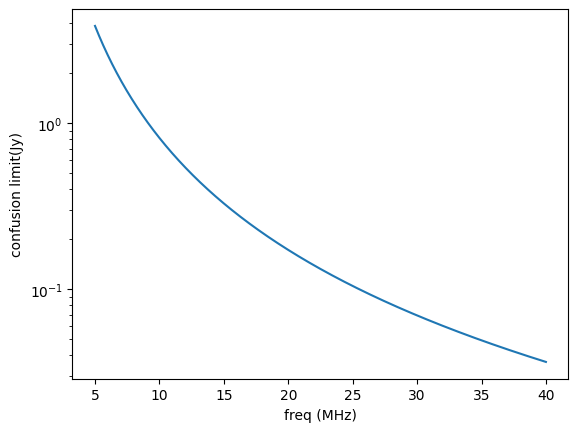

In [64]:
plt.semilogy(freqs/1e6,confs*1e-3)
plt.xlabel("freq (MHz)")
plt.ylabel("confusion limit(Jy)")

In [68]:
1*(178/30)**-0.7

0.28753510609553296